In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

In [2]:
# load dataset
transactions = pd.read_csv("Data/creditcard.csv")
transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#split dataset in features and target variable
X = transactions.drop(['Class'], axis=1) # Features
y = transactions.Class # Target variable

In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80% training and 20% test

In [43]:
# 'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto'
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(ccp_alpha= 0.001, criterion='gini', max_depth=5, max_features='auto')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [44]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9988939995084443


In [45]:
#Creating the Confusion matrix    
cm= confusion_matrix(y_test, y_pred) 

<AxesSubplot:>

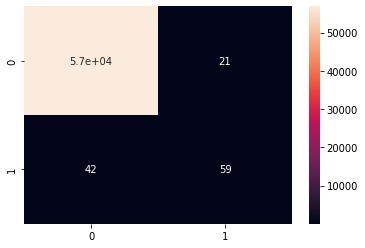

In [46]:
sns.heatmap(cm, annot=True)

<AxesSubplot:>

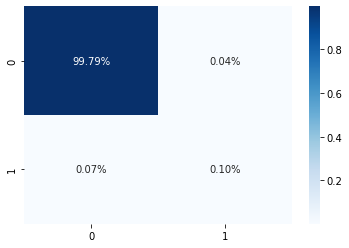

In [47]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))


Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 0.87
Macro Recall: 0.79
Macro F1-score: 0.83

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00

Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.74      0.58      0.65       101

    accuracy                           1.00     56962
   macro avg       0.87      0.79      0.83     56962
weighted avg       1.00      1.00      1.00     56962



In [49]:
TP, FN, FP, TN = 0, 0, 0, 0

def confusion_matrix_for(cls, cm):
    TP = cm[cls, cls]
    FN = cm[cls].sum() - TP
    FP = cm[:, cls].sum() - TP
    TN = cm.sum() - TP - FN - FP
    return np.array([[TP, FN], [FP, TN]])

def getTotalAmountFalseNegative(df):
    df = df[df.case == 'false negative'] 
    totalAmount = 0
    for index, row in df.iterrows():
        totalAmount += row.Amount
    return totalAmount

def total_cost(cm, X_test, y_test, y_pred):
    for cls in range(cm.shape[0]):
        #print(f'[Class {cls} vs others]')
        TP, FN, FP, TN = confusion_matrix_for(cls, cm).ravel()
        #print(f'TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}')
    
    print(f'TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}')

    labels = np.array(['true negative',   # y_test, y_pred = 0,0
                   'false positive',  # y_test, y_pred = 0,1
                   'false negative',  # y_test, y_pred = 1,0
                   'true positive'    # y_test, y_pred = 1,1
                  ])

    X_test['case'] = labels[y_test * 2 + y_pred]
    Ca = 5
    TotalCost = getTotalAmountFalseNegative(X_test) + (FP + TP) * Ca
    print('Total cost: ' + str(TotalCost))

In [50]:
total_cost(cm, X_test, y_test, y_pred)

TP: 59, FN: 42, FP: 21, TN: 56840
Total cost: 7967.540000000003


# Undersampling

In [13]:
# Split dataset into training set and test set
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X, y, test_size=0.2, stratify=y) # 80% training and 20% test

In [14]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_train_us, y_train_us = rus.fit_resample(X_train_us, y_train_us)

In [15]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_us = clf.fit(X_train_us,y_train_us)

#Predict the response for test dataset
y_pred_us = clf_us.predict(X_test_us)

In [16]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm_us = confusion_matrix(y_test_us, y_pred_us) 

<AxesSubplot:>

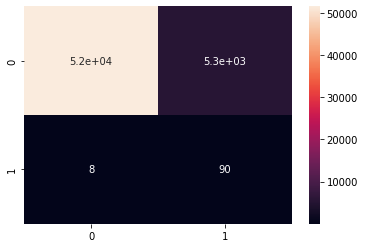

In [17]:
sns.heatmap(cm_us, annot=True)

<AxesSubplot:>

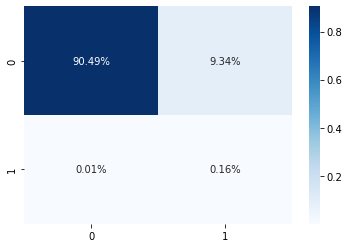

In [18]:
sns.heatmap(cm_us/np.sum(cm_us), annot=True, 
            fmt='.2%', cmap='Blues')

In [19]:
total_cost(cm_us, X_test_us, y_test_us, y_pred_us)

TP: 90, FN: 8, FP: 5320, TN: 51544
Total cost: 29349.62


# Oversampling

In [52]:
from imblearn.over_sampling import SMOTE

# Split dataset into training set and test set
X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) # 80% training and 20% test

smote_technique = SMOTE(sampling_strategy='minority')
X_smt, y_smt = smote_technique.fit_resample(X_train_smt, y_train_smt)

In [69]:
# decisiontreeclassifier__ccp_alpha': 0.001, 'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__max_features': 'auto'
model_smt = DecisionTreeClassifier(max_features='auto', max_depth=5, criterion='gini', ccp_alpha=0.001)

# Train
model_smt = model_smt.fit(X_smt,y_smt)

#Predict the response for test dataset
y_pred_smt = model_smt.predict(X_test_smt)

<AxesSubplot:>

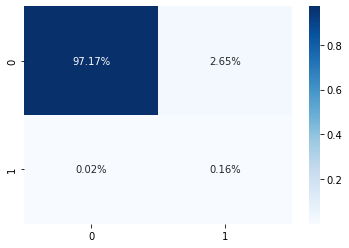

In [70]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm_smt = confusion_matrix(y_test_smt, y_pred_smt) 

sns.heatmap(cm_smt/np.sum(cm_smt), annot=True, 
            fmt='.2%', cmap='Blues')

In [71]:
total_cost(cm_smt, X_test_smt, y_test_smt, y_pred_smt)

TP: 89, FN: 9, FP: 1512, TN: 55352
Total cost: 8667.4


# Grid Search

In [37]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def get_x_elements_by_indices(x_train, indices):
    new_df = pd.DataFrame()
    for index in indices:
        try:
            new_df = new_df.append(x_train.iloc[index])
        except:
            print(str(index) + " not found")
    return new_df

def getTotalAmountFalseNegativeMyScorer(df, y_test, y_pred):
    fn_indices = []
    for ((index, row), i) in zip(y_test.items(), range(len(y_pred))):
        if y_pred[i]==0 and row!=y_pred[i]:
            fn_indices.append(index)
    print("No of FN: " + str(len(fn_indices)))
    df = df.iloc[fn_indices]
    totalAmount = 0
    for index, row in df.iterrows():
        totalAmount += row.Amount
    return totalAmount

def my_scorer(y_true, y_pred):
    model_cm = confusion_matrix(y_true, y_pred) 
    
    for cls in range(model_cm.shape[0]):
        #print(f'[Class {cls} vs others]')
        TP, FN, FP, TN = confusion_matrix_for(cls, model_cm).ravel() 
        
    labels = np.array(['true negative',   # y_test, y_pred = 0,0
                   'false positive',  # y_test, y_pred = 0,1
                   'false negative',  # y_test, y_pred = 1,0
                   'true positive'    # y_test, y_pred = 1,1
                  ])
    X_test_score = X
    # X_test_score = get_x_elements_by_indices(X_test_score, y_true.index)
    #print(labels[y_true * 2 + y_pred])
    #X_test_score['case'] = labels[y_true * 2 + y_pred]
    Ca = 5
    TotalCost = getTotalAmountFalseNegativeMyScorer(X_test_score, y_true, y_pred) + (FP + TP) * Ca
    print(TotalCost)
    return TotalCost

from sklearn.metrics import make_scorer
my_func = make_scorer(my_scorer, greater_is_better=False)

#my_scorer(y_test, y_pred)

In [31]:
fn_indices = []
for ((index, row), i) in zip(y_test.items(), range(len(y_pred))):
# for i in range(len(y_pred)): 
        if y_pred[i]==0 and row!=y_pred[i]:
            fn_indices.append(index)
            
fn_indices

[263080,
 231978,
 623,
 55401,
 57248,
 105178,
 275992,
 239501,
 243547,
 68320,
 149357,
 4920,
 102782,
 100623,
 157918,
 191074,
 197586,
 142557,
 220725,
 248971]

In [57]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

In [38]:
from sklearn.model_selection import GridSearchCV

# Define parameters
max_depth = [5, 6, 7, 8, 9]
criterion = ['gini', 'entropy']
max_features = ['auto', 'sqrt', 'log2']
ccp_alpha = [0.1, .01, .001]
param_grid = dict(max_depth=max_depth, criterion=criterion, max_features=max_features , ccp_alpha=ccp_alpha)

# Build the gridsearch
dtc = DecisionTreeClassifier(random_state=1024)
grid = GridSearchCV(estimator=dtc, param_grid=param_grid, scoring=my_func, cv = 5, verbose=10)

In [111]:
grid_results = grid.fit(X_train, y_train)

# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)
results_df

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5; 1/90] START ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto
No of FN: 78
7300.529999999998
[CV 1/5; 1/90] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=-7300.530 total time=   0.7s
[CV 2/5; 1/90] START ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto
No of FN: 78
10858.949999999997
[CV 2/5; 1/90] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=-10858.950 total time=   0.6s
[CV 3/5; 1/90] START ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto
No of FN: 78
6768.910000000001
[CV 3/5; 1/90] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=-6768.910 total time=   0.5s
[CV 4/5; 1/90] START ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto
No of FN: 78
7686.04
[CV 4/5; 1/90] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=-7686.040 total time=   0.5s
[CV 5/5; 1/90] STA

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_criterion,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.618004,0.073726,0.032795,0.011792,0.1,gini,5,auto,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",-7300.53,-10858.95,-6768.91,-7686.04,-16510.07,-9824.900,3634.473778,31
1,0.643188,0.080235,0.030802,0.004868,0.1,gini,5,sqrt,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",-7300.53,-10858.95,-6768.91,-7686.04,-16510.07,-9824.900,3634.473778,31
2,0.605411,0.024700,0.034792,0.004538,0.1,gini,5,log2,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",-7300.53,-10858.95,-6768.91,-7686.04,-16510.07,-9824.900,3634.473778,31
3,0.888216,0.022760,0.033994,0.003689,0.1,gini,6,auto,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",-7300.53,-10858.95,-6768.91,-7686.04,-16510.07,-9824.900,3634.473778,31
4,0.844388,0.011045,0.034401,0.007144,0.1,gini,6,sqrt,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",-7300.53,-10858.95,-6768.91,-7686.04,-16510.07,-9824.900,3634.473778,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.544590,0.124086,0.033417,0.004967,0.001,entropy,8,sqrt,"{'ccp_alpha': 0.001, 'criterion': 'entropy', '...",-7300.53,-7099.25,-6768.91,-7686.04,-10206.91,-7812.328,1233.621511,21
86,1.278403,0.081148,0.032801,0.002637,0.001,entropy,8,log2,"{'ccp_alpha': 0.001, 'criterion': 'entropy', '...",-7300.53,-7099.25,-6768.91,-7686.04,-10206.91,-7812.328,1233.621511,21
87,1.700187,0.093470,0.029201,0.004161,0.001,entropy,9,auto,"{'ccp_alpha': 0.001, 'criterion': 'entropy', '...",-7300.53,-7099.25,-6768.91,-7686.04,-10206.91,-7812.328,1233.621511,21
88,1.352605,0.167139,0.026002,0.002607,0.001,entropy,9,sqrt,"{'ccp_alpha': 0.001, 'criterion': 'entropy', '...",-7300.53,-7099.25,-6768.91,-7686.04,-10206.91,-7812.328,1233.621511,21


In [65]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def my_scorer_smt(y_true, y_pred):
    model_cm = confusion_matrix(y_true, y_pred) 
    
    for cls in range(model_cm.shape[0]):
        #print(f'[Class {cls} vs others]')
        TP, FN, FP, TN = confusion_matrix_for(cls, model_cm).ravel() 
        
    labels = np.array(['true negative',   # y_test, y_pred = 0,0
                   'false positive',  # y_test, y_pred = 0,1
                   'false negative',  # y_test, y_pred = 1,0
                   'true positive'    # y_test, y_pred = 1,1
                  ])
    X_test_score = X_smt
    # X_test_score = get_x_elements_by_indices(X_test_score, y_true.index)
    #print(labels[y_true * 2 + y_pred])
    #X_test_score['case'] = labels[y_true * 2 + y_pred]
    Ca = 5
    TotalCost = getTotalAmountFalseNegativeMyScorer(X_test_score, y_true, y_pred) + (FP + TP) * Ca
    print(TotalCost)
    return TotalCost

my_func_smt = make_scorer(my_scorer_smt, greater_is_better=False)

#my_scorer(y_test, y_pred)

In [66]:
from imblearn.pipeline import Pipeline, make_pipeline
# DecisionTreeClassifier
imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              DecisionTreeClassifier())

In [67]:
# grid_smt = GridSearchCV(estimator=dtc, param_grid=param_grid, scoring=my_func_smt, cv = 5, verbose=10)
new_params = {'decisiontreeclassifier__' + key: param_grid[key] for key in param_grid}
# grid_c = GridSearchCV(estimator=dfrst_c, param_grid=param_grid_criterion, scoring=my_func, cv = 5, verbose=10)return_train_score=True,
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=5, scoring=my_func_smt,  verbose=10)
grid_search_imba = grid_imba.fit(X_train, y_train);

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5; 1/90] START decisiontreeclassifier__ccp_alpha=0.1, decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=5, decisiontreeclassifier__max_features=auto
No of FN: 19
14833.224729874175
[CV 1/5; 1/90] END decisiontreeclassifier__ccp_alpha=0.1, decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=5, decisiontreeclassifier__max_features=auto;, score=-14833.225 total time=   2.0s
[CV 2/5; 1/90] START decisiontreeclassifier__ccp_alpha=0.1, decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=5, decisiontreeclassifier__max_features=auto
No of FN: 12
8312.690974968376
[CV 2/5; 1/90] END decisiontreeclassifier__ccp_alpha=0.1, decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=5, decisiontreeclassifier__max_features=auto;, score=-8312.691 total time=   1.7s
[CV 3/5; 1/90] START decisiontreeclassifier__ccp_alpha=0.1, decisiontreeclassifier__crit

In [68]:
# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_search_imba.cv_results_['mean_test_score'], grid_search_imba.best_params_))
results_df_smt = pd.DataFrame(grid_results_smt.cv_results_)
results_df_smt

Best: [-11436.52549112 -13192.91890319 -19729.81714754 -14748.51040067
 -13863.05750965 -13508.34294167 -13127.03997895 -14247.21309152
 -17551.5000643  -13930.40312616 -15182.30600189 -23808.58337047
 -11921.23134942 -19376.89889569 -14436.16430445 -10324.44450097
 -10420.2044891  -11766.36942741 -10345.22380365 -10454.48899288
 -14146.19179365 -11165.77417164  -8332.11989305 -15090.36425682
 -11439.24642506 -13193.48740627 -17494.62366395  -7120.66666983
  -7776.84419537  -9134.91961448 -11354.10864197  -7151.69517519
 -12336.8060877  -13503.90970023  -9399.00019841 -15705.27390868
  -6459.6782402  -13079.07989998  -8781.1474516  -11175.54950664
 -11671.90668375  -8610.27834302  -7617.19588405  -6818.58504358
  -9252.893935    -9616.64090959  -9399.1950696  -11215.99219841
  -9776.32968688 -10509.04746053 -10063.10094363  -8208.03101422
  -8915.47810325 -10467.36867313 -10743.5215226  -11347.41658177
 -12044.08552796  -9400.0672315  -10135.63077253  -7181.19501422
  -5904.09058177 -1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_criterion,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.974401,0.015331,0.195806,0.004123,0.1,gini,5,auto,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",-872017.500243,-872989.091889,-890836.866850,-873431.419169,-864883.996637,-874831.774958,8583.680789,58
1,0.963405,0.015793,0.193794,0.004016,0.1,gini,5,sqrt,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",-872017.500243,-872989.091889,-890836.866850,-873431.419169,-864883.996637,-874831.774958,8583.680789,58
2,0.825584,0.030615,0.200809,0.004451,0.1,gini,5,log2,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",-872017.500243,-872989.091889,-890836.866850,-873431.419169,-864883.996637,-874831.774958,8583.680789,58
3,1.118216,0.011486,0.193384,0.004886,0.1,gini,6,auto,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",-872017.500243,-872989.091889,-890836.866850,-873431.419169,-864883.996637,-874831.774958,8583.680789,58
4,1.137192,0.020983,0.193208,0.002313,0.1,gini,6,sqrt,"{'ccp_alpha': 0.1, 'criterion': 'gini', 'max_d...",-872017.500243,-872989.091889,-890836.866850,-873431.419169,-864883.996637,-874831.774958,8583.680789,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,3.148191,0.152200,0.127201,0.016054,0.001,entropy,8,sqrt,"{'ccp_alpha': 0.001, 'criterion': 'entropy', '...",-493311.561269,-652526.134862,-501155.994737,-543219.621596,-513558.167101,-540754.295913,58408.029862,7
86,2.654792,0.191994,0.131208,0.012183,0.001,entropy,8,log2,"{'ccp_alpha': 0.001, 'criterion': 'entropy', '...",-479858.786978,-490910.566133,-533066.395201,-544807.506688,-536646.697401,-517057.990480,26372.298540,4
87,2.786601,0.255965,0.093988,0.013485,0.001,entropy,9,auto,"{'ccp_alpha': 0.001, 'criterion': 'entropy', '...",-435284.613185,-522406.623923,-572849.258782,-427938.013512,-561130.737901,-503921.849461,61400.562030,1
88,3.223402,0.315411,0.129399,0.010394,0.001,entropy,9,sqrt,"{'ccp_alpha': 0.001, 'criterion': 'entropy', '...",-435284.613185,-522406.623923,-572849.258782,-427938.013512,-561130.737901,-503921.849461,61400.562030,1


# Dropping outliers

In [78]:
from sklearn.ensemble import IsolationForest

anomaly_inputs = []
for name in transactions.columns[1:29]:
    anomaly_inputs.append(name)
anomaly_inputs.append('Class')

model_IF = IsolationForest(contamination=float(0.1),random_state=42)

anomaly_df = transactions
model_IF.fit(anomaly_df[anomaly_inputs])

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=42)

In [79]:
anomaly_df['anomaly_scores'] = model_IF.decision_function(anomaly_df[anomaly_inputs])
anomaly_df['anomaly'] = model_IF.predict(anomaly_df[anomaly_inputs])

In [95]:
df_wo_o = anomaly_df[(anomaly_df["anomaly"]==1) | ((anomaly_df["Class"]==1) & (anomaly_df["anomaly"]==-1))]
df_wo_o = df_wo_o.drop("anomaly", axis='columns')
df_wo_o = df_wo_o.drop("anomaly_scores", axis='columns')

In [96]:
from imblearn.over_sampling import SMOTE

#split dataset in features and target variable
X_wo_outliers = df_wo_o.drop(['Class'], axis=1) # Features
y_wo_outliers = df_wo_o.Class # Target variable

# Split dataset into training set and test set
X_train_smt_wo_outliers, X_test_smt_wo_outliers, y_train_smt_wo_outliers, y_test_smt_wo_outliers = train_test_split(X_wo_outliers, y_wo_outliers, test_size=0.2, stratify=y_wo_outliers, random_state=42) # 80% training and 20% test

smote_technique = SMOTE(sampling_strategy='minority')
X_smt_wo_outliers, y_smt_wo_outliers = smote_technique.fit_resample(X_train_smt_wo_outliers, y_train_smt_wo_outliers)

In [97]:
# decisiontreeclassifier__ccp_alpha': 0.001, 'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__max_features': 'auto'
model_smt_wo_outliers = DecisionTreeClassifier(max_features='auto', max_depth=5, criterion='gini', ccp_alpha=0.001)

# Train
model_smt_wo_outliers = model_smt_wo_outliers.fit(X_smt_wo_outliers,y_smt_wo_outliers)

#Predict the response for test dataset
y_pred_smt_wo_outliers = model_smt_wo_outliers.predict(X_test_smt_wo_outliers)

<AxesSubplot:>

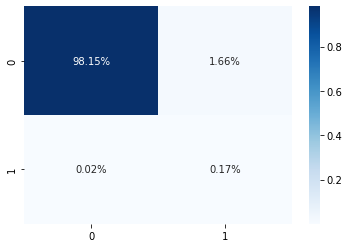

In [98]:
cm_smt_wo_outliers = confusion_matrix(y_test_smt_wo_outliers, y_pred_smt_wo_outliers) 

sns.heatmap(cm_smt_wo_outliers/np.sum(cm_smt_wo_outliers), annot=True, 
            fmt='.2%', cmap='Blues')

In [99]:
total_cost(cm_smt_wo_outliers, X_test_smt_wo_outliers, y_test_smt_wo_outliers, y_pred_smt_wo_outliers)

TP: 88, FN: 10, FP: 853, TN: 50404
Total cost: 7584.08


In [102]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def my_scorer_smt_wo_outliers(y_true, y_pred):
    model_cm = confusion_matrix(y_true, y_pred) 
    
    for cls in range(model_cm.shape[0]):
        #print(f'[Class {cls} vs others]')
        TP, FN, FP, TN = confusion_matrix_for(cls, model_cm).ravel() 
        
    labels = np.array(['true negative',   # y_test, y_pred = 0,0
                   'false positive',  # y_test, y_pred = 0,1
                   'false negative',  # y_test, y_pred = 1,0
                   'true positive'    # y_test, y_pred = 1,1
                  ])
    X_test_score = X_smt_wo_outliers
    # X_test_score = get_x_elements_by_indices(X_test_score, y_true.index)
    #print(labels[y_true * 2 + y_pred])
    #X_test_score['case'] = labels[y_true * 2 + y_pred]
    Ca = 5
    TotalCost = getTotalAmountFalseNegativeMyScorer(X_test_score, y_true, y_pred) + (FP + TP) * Ca
    print(TotalCost)
    return TotalCost

my_func_smt_wo_outliers = make_scorer(my_scorer_smt_wo_outliers, greater_is_better=False)

In [104]:
grid_imba_wo_outliers = GridSearchCV(imba_pipeline, param_grid=new_params, cv=5, scoring=my_func_smt_wo_outliers,  verbose=10)
grid_search_imba_wo_outliers = grid_imba_wo_outliers.fit(X_train, y_train);

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5; 1/90] START decisiontreeclassifier__ccp_alpha=0.1, decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=5, decisiontreeclassifier__max_features=auto
No of FN: 12
7963.434010320393
[CV 1/5; 1/90] END decisiontreeclassifier__ccp_alpha=0.1, decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=5, decisiontreeclassifier__max_features=auto;, score=-7963.434 total time=   1.9s
[CV 2/5; 1/90] START decisiontreeclassifier__ccp_alpha=0.1, decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=5, decisiontreeclassifier__max_features=auto
No of FN: 24
13986.525943608309
[CV 2/5; 1/90] END decisiontreeclassifier__ccp_alpha=0.1, decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=5, decisiontreeclassifier__max_features=auto;, score=-13986.526 total time=   1.7s
[CV 3/5; 1/90] START decisiontreeclassifier__ccp_alpha=0.1, decisiontreeclassifier__crit

In [107]:
# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_search_imba_wo_outliers.cv_results_['mean_test_score'], grid_search_imba_wo_outliers.best_params_))
results_df_smt_wo_outliers = pd.DataFrame(grid_search_imba_wo_outliers.cv_results_)
results_df_smt_wo_outliers

Best: [ -9707.23597833  -6937.94698492 -13208.69047817 -16799.08655868
  -8781.4490015  -12068.40948587  -9577.70021776 -13266.25472218
 -18627.61484764 -10399.72178298 -17964.39369345 -22840.71294475
 -14481.78931154 -14043.08882092 -16743.92666059 -24785.87337634
 -15344.63616613  -7817.53472612  -6670.44431506  -7159.38445297
 -12632.14840048  -9562.45117794 -15107.79225544 -18074.08808623
 -10153.07688592 -11311.49202985  -9643.29637787  -8973.3557201
 -11081.79604593 -14671.19742677 -11311.4380854  -10132.2381212
 -15234.4364569   -9425.2147936   -9007.5537929   -7131.43163199
  -8978.67072552 -14276.92044281  -8395.42346716  -6417.57539901
  -4332.57174822  -8956.49994557  -6663.60736064 -11515.43221092
  -9195.37623509  -9607.21829357  -7512.62530539 -11542.9177062
  -7376.68899976  -9117.52215207  -9279.64174     -8522.49586384
  -9990.83514635  -7865.09084764 -11489.16867705  -9361.22244221
  -7975.36574    -10826.54321922  -8725.74664764  -6929.23638537
  -5593.86787712  -780

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__ccp_alpha,param_decisiontreeclassifier__criterion,param_decisiontreeclassifier__max_depth,param_decisiontreeclassifier__max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.683206,0.162011,0.024194,0.001167,0.1,gini,5,auto,"{'decisiontreeclassifier__ccp_alpha': 0.1, 'de...",-7963.434010,-13986.525944,-9567.130000,-7655.949938,-9363.140000,-9707.235978,2267.111557,61
1,1.507594,0.051508,0.025199,0.001939,0.1,gini,5,sqrt,"{'decisiontreeclassifier__ccp_alpha': 0.1, 'de...",-3997.261392,-6610.929020,-10477.436010,-4240.968503,-9363.140000,-6937.946985,2624.416474,24
2,1.719399,0.059264,0.031195,0.003813,0.1,gini,5,log2,"{'decisiontreeclassifier__ccp_alpha': 0.1, 'de...",-9554.367484,-20820.129020,-9567.130000,-14244.838503,-11856.987383,-13208.690478,4182.098514,75
3,2.272006,0.029632,0.032194,0.004796,0.1,gini,6,auto,"{'decisiontreeclassifier__ccp_alpha': 0.1, 'de...",-17312.137846,-4057.159020,-13544.481419,-22237.343965,-26844.310544,-16799.086559,7793.504503,85
4,2.156406,0.095211,0.027994,0.003848,0.1,gini,6,sqrt,"{'decisiontreeclassifier__ccp_alpha': 0.1, 'de...",-9554.367484,-4057.159020,-16691.610000,-4240.968503,-9363.140000,-8781.449001,4613.920099,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,3.528994,0.131401,0.030206,0.003370,0.001,entropy,8,sqrt,"{'decisiontreeclassifier__ccp_alpha': 0.001, '...",-7195.200983,-4916.544371,-5913.880000,-7615.563965,-7441.860000,-6616.609864,1039.015564,17
86,3.071400,0.322772,0.036801,0.004214,0.001,entropy,8,log2,"{'decisiontreeclassifier__ccp_alpha': 0.001, '...",-4802.779116,-8538.674368,-6016.130000,-4785.253965,-8917.580000,-6612.083490,1788.469489,16
87,4.105600,0.351339,0.030601,0.004226,0.001,entropy,9,auto,"{'decisiontreeclassifier__ccp_alpha': 0.001, '...",-5374.200983,-6344.784371,-8253.110000,-6462.618503,-6903.440000,-6667.630772,936.864005,19
88,4.152205,0.153601,0.032192,0.001723,0.001,entropy,9,sqrt,"{'decisiontreeclassifier__ccp_alpha': 0.001, '...",-6729.359134,-4906.354546,-6286.610000,-6071.745399,-7359.680000,-6270.749816,812.098542,13


In [110]:
from imblearn.under_sampling import RandomUnderSampler
imba_pipeline_us = make_pipeline(RandomUnderSampler(sampling_strategy=1), 
                              DecisionTreeClassifier())

In [ ]:
grid_imba_us = GridSearchCV(imba_pipeline_us, param_grid=new_params, cv=5, scoring=my_func_smt,  verbose=10)
grid_search_imba = grid_imba.fit(X_train, y_train);